# Plotting a parametric function

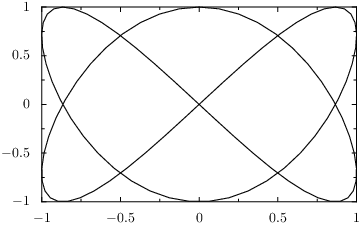

In [1]:
from math import pi
from pyx import *

g = graph.graphxy(width=8)
g.plot(graph.data.paramfunction("k", 0, 2*pi, "x, y = sin(2*k), cos(3*k)"))
g

This example shows how to use a `paramfunction` as a data source for a graph.
`paramfunction` defines a parameter variable name given as a string in the first
argument, a minimal and a maximal value given as the second and third argument
and an expression string as forth argument.  This expression string assigns a
tuple of expressions to a tuple of data names. As usual the styles will decide
what those data names are responsible for.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> Like for the function, you can also access external data and functions in your
expression. Suppose we want to provide the data for this example by means of
the following python function:

    def lissajousdata(k):
        return sin(2*k), cos(3*k)

Then we would need to modify the plot command to:

    g.plot(graph.data.paramfunction("t", min, max, "x, y = f(t)",
                                    context={"f": lissajousdata}))

Note, that `t` and `f` in the string expression stand for `k` and `lissajousdata`
respectively. You can also use the same names in the expression if you like.

<img src="http://pyx.sourceforge.net/bend.png" align="left"> When you try this, you will notice, that you need to add `sin` and `cos` to the
list of imported symbols from the math module. While this should be expected,
it is more interesting to note, that it was not necessary to import those
functions before. The reason is, that the string expressions are evaluated in
a certain context. This context does not only contain the symbols given in the
`context` keyword argument, but in addition some standard mathematical functions
(and constants) including `sin` and `cos`. See the reference manual for a complete
list.

For the common case of plotting a parametric function providing data for `x` and
`y` by means of an external function, there is a special `paramfunctionxy` which
directly calls the external function instead of using a context in a string
expression. A `lambda` expression could serve to provide the data inline, which
results in:

    g.plot(graph.data.paramfunctionxy(lambda k: (sin(2*k), cos(3*k)), 0, 2*pi))

Note that the external expression is provided in the first argument here.
Since the system just need to call the function, the parameter variable name
does not have to be provided to `paramfunctionxy`.
